* **Project Objective**

The main goal of this project was to detect brain tumor using Convolutional Neural Networks (CNNs). This model classifies brain images into two categories 'Healthy' and 'Brain Tumor'.
*  **Image Preprocessing**

Images from the dataset were converted into numerical data suitable for model training and were transformed to grayscale.
*  **CNN Model**

A CNN model was created with layers, including convolutional, pooling and dense (fully-connected) layers.

*  **Training and Validation**

The original dataset was split into training and validation sets. The model was trained on the training set and its performance was evaluated using the validation set.

*  **Prediction on a random image**

To test the model's practical performance, the model classified a randomly selected image from the dataset into one of two categories.


In [ ]:
import os
import kagglehub

# Data
path = "/root/.cache/kagglehub/datasets/preetviradiya/brian-tumor-dataset/versions/1"

**Dataset**

The dataset consisted of 4526 MRI brain scans which were classified into two categories 'Healthy' and 'Brain Tumor'. There were 54.02% images labeld as 'Brain Tumor' and 45.98% labeld as 'Healthy'.

In [ ]:
image_folder = os.path.join(path, "Brain Tumor Data Set", "Brain Tumor Data Set")
print(os.listdir(image_folder))


['Brain Tumor', 'Healthy']


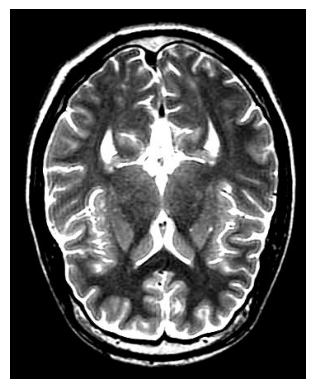

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Check whether data was well downloaded
# First image of healty brain
healthy_folder = os.path.join(image_folder, "Healthy")
healthy_images = [f for f in os.listdir(healthy_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.tif'))]
num_healthy = len(healthy_images)

if healthy_images:
    first_healthy_image_path = os.path.join(healthy_folder, healthy_images[0])
    img = Image.open(first_healthy_image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("No pictures of healthy brain.")


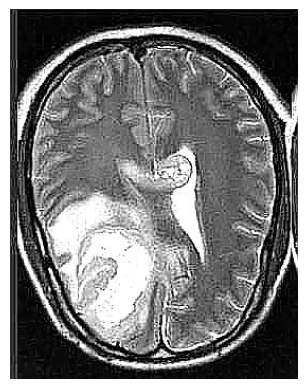

In [ ]:
#First image of the brain with cancer
cancer_folder = os.path.join(image_folder, "Brain Tumor")
cancer_images = [f for f in os.listdir(cancer_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.tif'))]
num_cancer = len(cancer_images)
if cancer_images:
    first_cancer_image_path = os.path.join(cancer_folder, cancer_images[0])
    img = Image.open(first_cancer_image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("No pictures of brain with cancer.")

In [ ]:
total_num = num_cancer+num_healthy
print(f'Total number of data samples: {total_num}')

Total number of data samples: 4526


<ipython-input-52-f328ce941b4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['tumor','healthy'],y=[num_cancer,num_healthy], palette=["pink", "purple"])


Text(0.5, 1.0, 'Dataset Representation')

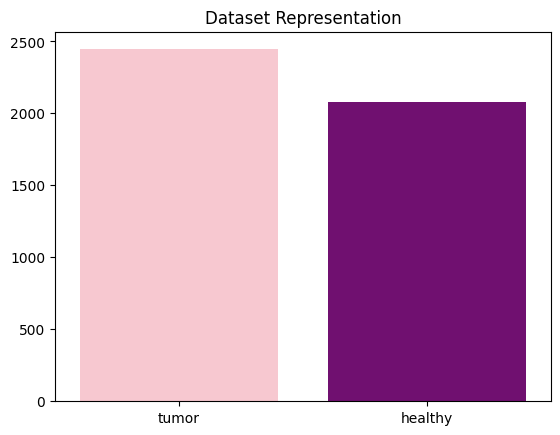

In [ ]:
# Representation of data
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=['tumor','healthy'],y=[num_cancer,num_healthy], palette=["pink", "purple"])
plt.title("Dataset Representation")

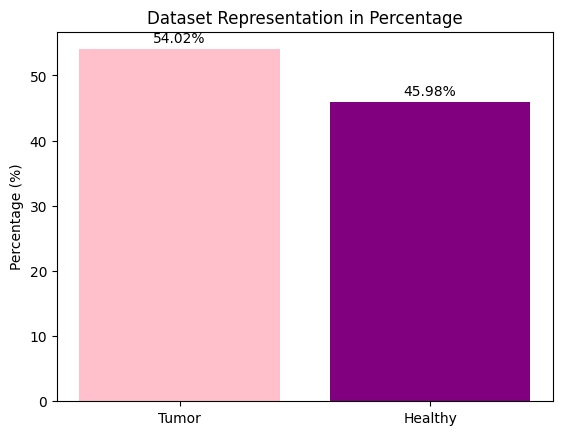

In [ ]:
# Representation of data in percentage
labels = ['Tumor', 'Healthy']
percentages = [num_cancer / total_num * 100, num_healthy / total_num * 100]

plt.bar(labels, percentages, color=['pink', 'purple'])

plt.ylabel("Percentage (%)")
plt.title("Dataset Representation in Percentage")

for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()



*   **Color format**

All the images were converted in grayscale (the number of channels is one) to ensure uniformity and reduce computational complexity.
*   **Image size**

As the images in the dataset varied in size, it was necessary to reshape them. All of them were resized to 128 x 128 pixels.


*   **Splitting data**

The dataset was split into 80% training data and 20% validation data in order to evaluate the model's performance on unseen data.



*  **Batching**

The images were processed in batches of 64 in order to optimize memory usage and fasten the model training.

*   **Shuffling**

In order to ensure random order of images before being passed to the model, it was necessary to shuffle the train set before each epoch. Shuffling is of utmost importance when it comes to preventing models from learning patterns based on the order of the images instead of their features.




In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Preprocessing of picture
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  #grayscale
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Spliting into train and validation datasets
all_data = datasets.ImageFolder(root=image_folder, transform=transform)
train_size = int(0.8 * len(all_data))
val_size = len(all_data) - train_size


train_data, val_data = random_split(all_data, [train_size, val_size])



In [ ]:
# Checking classes of data
print(all_data.class_to_idx)

{'Brain Tumor': 0, 'Healthy': 1}


In [ ]:
#Checking the shape and label of the image
image, label = train_data[0]
print(image.shape)
print(label)

torch.Size([1, 128, 128])
0


In [ ]:
# Creation of DataLoader-a
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)


CNNs consist of convolutional layers, pooling layers and fully connected layers. This CNN has two 2 convolutional and pooling layers.

*   **Convolutional Layer**

The main aim of this layer was to extract significant visual features from the raw input images. This was achieved by sliding the kernel or filter over the image. In this model, a 3x3 kernel was used. At each position a dot product was calculated between kernel's weights and the corresponding pixel values of the image.

*   **Pooling Layer**

The primary goal of this layer was to reduce the spatial dimensions of the feature maps, which helps with decreasing the number of parameters, speeding up computation, and preventing overfitting.There are several methods of pooling for example max and average pooling. In this case max pooling was used. Max pooling selects the maximum value within each region of the feature map, while discarding other values.

*   **Fully Connected Layer**

The fully connected layer integrates the various features extracted in the previous convolutional and pooling layers and maps them to specific classes or outcomes.The softmax activation function was used to obtain probabilities for each class.

*   **Dropout layer**

The purpose of the dropout layer is to reduce overfitting by dropping neurons from the neural network during training. This reduces the size of the model and helps prevent overfitting.


**Model summary analysis**

**Conv2D Layer 1:**

Output shape : 126x126
This layer applies filters of size 3x3 to the input image (128x128) and produces 126x126 feature maps.

**MaxPooling2D Layer 1:**

Output shape: 63x63
This layer performs the max pooling operation, reducing the dimensions by half from 126x126 to 63x63.

**Conv2D Layer 2:**

Output shape : 61x61
This layer applies filters of size 3x3 to the feature maps from the previous layer.

**MaxPooling2D Layer 2:**

Output Shape: 30x30
This layer performs another max pooling operation, reducing the dimensions from 61x61 to 30x30.

In [ ]:
# Creating a model
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #Fully connected layer
    self.fc1 = nn.Linear(30*30*16, 520)
    self.dropout2 = nn.Dropout(0.2)
    self.fc2 = nn.Linear(520, 120)
    self.dropout2 = nn.Dropout(0.2)
    self.fc3 = nn.Linear(120, 2)

  def forward(self, X):
    #First pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)

    #Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    #Flatten
    X = X.view(-1,30*30*16)

    #Fully connected layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [ ]:
# Creating an instance of class ConvolutionalNetwork
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=14400, out_features=520, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=520, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=2, bias=True)
)

The model was trained for 5 epochs. Below are the key observations:

**Training Performance**

After training for 5 epochs, the model achieved a training accuracy of 98.32% with a training loss of 0.0585. This indicates that the model is learning the features of the training dataset effectively and minimizing the error over time.

**Validation Performance**

Once training was complete, the model was evaluated on the validation set. The final validation accuracy reached 95.87%, while the validation loss dropped to 0.0197. These results suggest that the model is generalizing well to unseen data without overfitting.


In [ ]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

#Create variables to track progress
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  train_corr = 0
  test_corr = 0
  model.train()
  running_loss = 0.0

  for images, labels in train_loader:

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        predicted=torch.max(outputs.data, 1)[1]
        batch_corr = (predicted == labels).sum()
        train_corr+=batch_corr

        # Zeroing gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Optimizing weights
        optimizer.step()

        running_loss += loss.item()

  train_losses.append(loss)
  train_correct.append(train_corr)

  print(f"Epoch [{i+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

   #Test

  with torch.no_grad():
   for X_test, y_test in val_loader:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    test_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)

# How long did the process take
current_time = time.time()
total = current_time - start_time
print(f'Trainig took: {total/60} minutes')


Epoch [1/5], Loss: 0.5776
Epoch [2/5], Loss: 0.3280
Epoch [3/5], Loss: 0.1886
Epoch [4/5], Loss: 0.1256
Epoch [5/5], Loss: 0.0595
Trainig took: 3.003821043173472 minutes


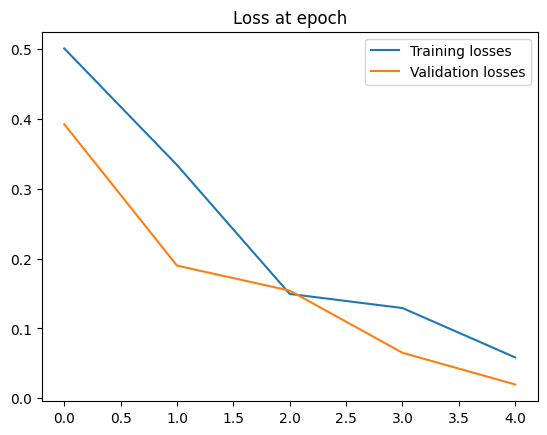

In [ ]:
#Visualisation of the loss
train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label = "Training losses")
plt.plot(test_losses, label = "Validation losses")
plt.title("Loss at epoch")
plt.legend()

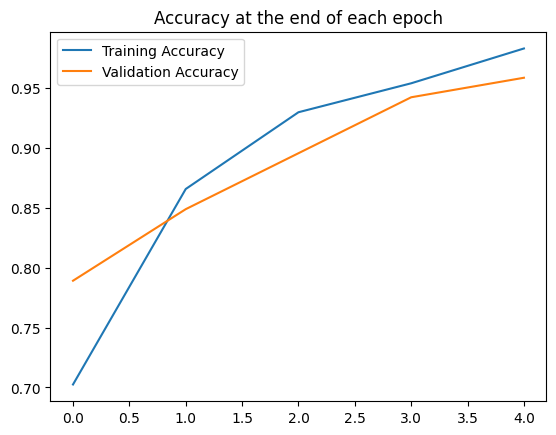

In [ ]:
# Visualisation of the accuracy at the end of each epoch
plt.plot([t/len(train_data) for t in train_correct], label = "Training Accuracy")
plt.plot([t/len(val_data) for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [ ]:
#Validation accuracy
value = test_correct[-1]/len(val_data)*100
print(f'Final Validation Accuracy: {value:.2f}%')

Final Validation Accuracy: 95.87%


In [ ]:
#Training accuracy
final_training_accuracy = train_correct[-1] / len(train_data)
print(f'Final Training Accuracy: {final_training_accuracy * 100:.2f}%')


Final Training Accuracy: 98.32%


In [ ]:
#Final test loss
final_test_loss = test_losses[-1]
print(f'Total Test Loss: {final_test_loss:.4f}')


Total Test Loss: 0.0197


In [ ]:
#Final train loss
final_training_loss = train_losses[-1]
print(f'Total Train Loss: {final_training_loss:.4f}')

Total Train Loss: 0.0585


A random image from the dataset was selected, preprocessed, and classified using the trained model. The model's prediction was correct.

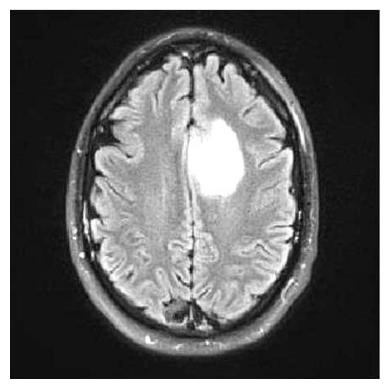

In [ ]:
# FINAL PREDICTION FOR RANDOM FROM DATASET IMAGE

category_path = os.path.join(image_folder, 'Brain Tumor')
image_files = os.listdir(category_path)

first_image_path = os.path.join(category_path, image_files[20])

img = Image.open(first_image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# Preprocessing of the image
processed_image = transform(img)

In [ ]:
#pass image throw model
model.eval()
with torch.no_grad():
  new_prediction = model(processed_image)

In [ ]:
# Result
result = new_prediction.argmax().item()

if result == 0:
    print("Brain Tumor")
else:
    print("Healthy")

Brain Tumor
